In [2]:
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
#import xlrd

In [2]:
loc = ("/Users/erezaei/Google Drive/TouchAssay_GooDriv/Dpy-rol-20210105/Touch Assay_20210105.xlsx")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)
print(sheet.cell_value(31, 4))
#print(wb)

N2


In [3]:
filename_w_ext = os.path.basename(loc)
fileName, file_extension = os.path.splitext(filename_w_ext)
workbook = xlrd.open_workbook(loc)
Strain=[]
Means=[]
error=[]
labels=[] 

In [4]:
for llm in range(0,16):
    worksheet = workbook.sheet_by_index(llm)
    Datee=worksheet.cell(31, 0).value
    
    if Datee:
        #print(llm)
        word=worksheet.cell(31, 4).value
        if word not in Strain:
            Strain.append(word)
#    import pdb; pdb.set_trace()
SumMat=np.zeros((100, len(Strain))) 

for jj in range(0,2):
    worksheet = workbook.sheet_by_index(jj)
    Datee=worksheet.cell(31, 0).value
    if Datee:
        Sumi=np.zeros((25,1)) 
        word=worksheet.cell(31, 4).value
        index = Strain.index(word)    
        for Trail in range(0,25):
            Ssam=np.zeros((1,10)) 
            for Touch in range(0,10):
                Touch_Add=worksheet.cell(Trail+1, Touch+1).value
                if Touch_Add== '':
                    Touch_Add=0
                Ssam[0,Touch]=Touch_Add
            TrailSum=np.sum(Ssam)    
            Sumi[Trail,0]=TrailSum 
            #print(Means)
            Means.append(np.mean(Sumi))
            error.append(np.std(Sumi))
    
            #print(error)
            
        
#        # FirsZer=np.argwhere(SumMat[:,index] == 0)[0,0]
#         Varib1=np.sum(SumMat[0:25,index]) 
#         Varib2=np.sum(SumMat[25:50,index]) 
#         Varib3=np.sum(SumMat[50:75,index])
        
#         if Varib1 == 0 :
#             SumMat[0:25,index]=Sumi 
            
    
#         elif (Varib2==0 and Varib1 > 0): 
#             SumMat[25:50,index]=Sumi
            
#         elif (Varib3==0 and Varib1>0 and Varib2>0):  
#             SumMat[50:75,index]=Sumi   

ValueError: shape mismatch: objects cannot be broadcast to a single shape

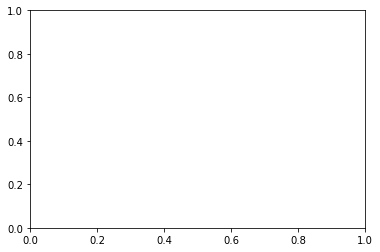

In [5]:
# Calculate the average and the standard deviation
Leng=len(np.squeeze(np.asarray(SumMat[1,:])))
for i in range(0,Leng):
    Means.append(np.mean(SumMat[:,i]))
    error.append(np.std(SumMat[:,i]))
    #print(Means)
    #print(error)
x_pos = np.arange(Leng)

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, Means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Touch Response')
ax.set_xticks(x_pos)
ax.set_xticklabels(Strain)
ax.set_title('Touch Assay')
ax.yaxis.grid(True)

#Save the figure and show
plt.tight_layout()
plt.savefig(str(fileName) +'.tiff', dpi=600)
plt.show()

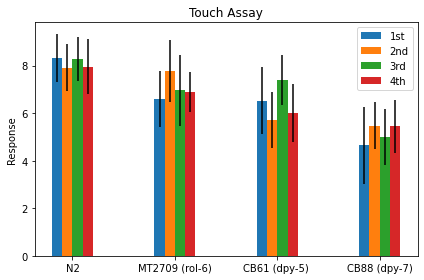

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


men_means, men_std = (8.32, 6.6, 6.52, 4.64), (1.029563014, 1.190238071, 1.417744688, 1.604161255)
women_means, women_std = (7.92, 7.76, 5.72, 5.48), (0.996661093, 1.3, 1.173314394, 1.004987562)
me_means, me_std = (8.28, 6.96, 7.4, 5), (0.936304794, 1.48548533, 1.040833, 1.190238071)
wo_means, wo_std = (7.96, 6.88, 6, 5.44), (1.171893055, 0.8326664, 1.224744871, 1.121011448)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - 1.5*width, men_means, width, yerr=men_std,
                label='1st')
rects2 = ax.bar(ind - width/2, women_means, width, yerr=women_std,
                label='2nd')
rects3 = ax.bar(ind + width/2, me_means, width, yerr=me_std,
                label='3rd')
rects4 = ax.bar(ind + (1.5*width), wo_means, width, yerr=wo_std,
                label='4th')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Response')
ax.set_title('Touch Assay')
ax.set_xticks(ind)
ax.set_xticklabels(('N2', 'MT2709 (rol-6)', 'CB61 (dpy-5) ', 'CB88 (dpy-7)'))
ax.legend()
fig.tight_layout()
plt.savefig('Days.tiff',dpi=600)
plt.show()

In [3]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

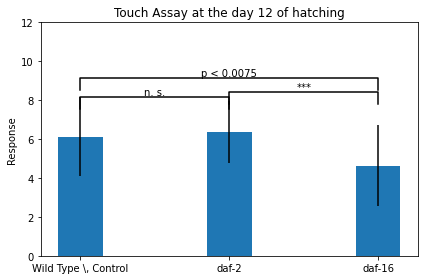

In [10]:
All_means, All_std = (6.12,6.36,4.64), (2.027,1.578,2.099)
ind = np.arange(len(All_means))  # the x locations for the groups
width = 0.3  # the width of the bars

bars = np.arange(len(All_means))


fig1, ax = plt.subplots()
rects1 = ax.bar(ind - .0*width, All_means, width, yerr=All_std,
                label='1st')
ax.set_ylabel('Response')
ax.set_title('Touch Assay at the day 12 of hatching')
ax.set_xticks(ind)
ax.set_xticklabels(('Wild Type \, Control', 'daf-2', 'daf-16'))
#ax.legend()
plt.ylim(0, 12)
barplot_annotate_brackets(0, 1, .1, bars, All_means, dh=.1)
barplot_annotate_brackets(1, 2, .0001, bars, All_means, dh=.12)
barplot_annotate_brackets(0, 2, 'p < 0.0075', bars, All_means, dh=.20)


fig1.tight_layout()
plt.savefig('Muntathar_Touch.tiff', dpi=600)
plt.show()